In [34]:
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import matplotlib.pyplot as plt
import numpy as np

In [35]:
df_local = pd.read_csv("data/processed/fb_local/fb-Qwen2.5-7B.csv")
df_hf = pd.read_csv("data/processed/fb/fb-Qwen2.5-7B.csv")

In [38]:
df_hf['lo_endpoints'] = df_hf['log_odds']
df_hf['lp_start_endpoints'] = df_hf['lp_start']
df_hf['lp_end_endpoints'] = df_hf['lp_end']

df_local['lo_local'] = df_local['log_odds']
df_local['lp_start_local'] = np.log2(df_local['start_prob'])
df_local['lp_end_local'] = np.log2(df_local['end_prob'])


In [39]:
df_hf = df_hf[['condition', 'passage', 'lo_endpoints', 'lp_start_endpoints', 'lp_end_endpoints']]
df_local = df_local[['condition', 'passage', 'lo_local', 'lp_start_local', 'lp_end_local']]


In [40]:
df_merged = pd.merge(df_hf, df_local)

<Axes: xlabel='lo_endpoints', ylabel='lo_local'>

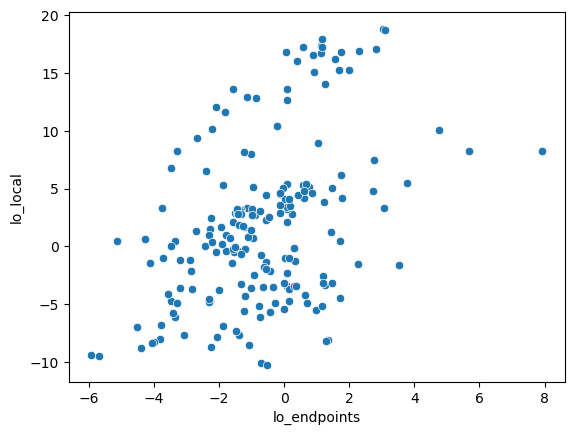

In [41]:
sns.scatterplot(data = df_merged, x = "lo_endpoints", y = "lo_local")

<Axes: xlabel='lp_start_endpoints', ylabel='lp_start_local'>

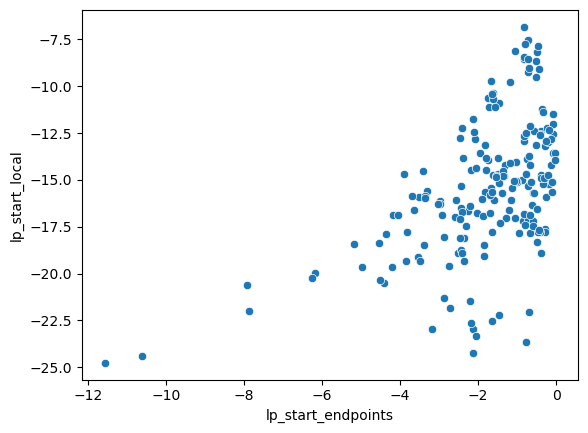

In [43]:
sns.scatterplot(data = df_merged, x = "lp_start_endpoints", y = "lp_start_local")

<Axes: xlabel='lp_end_endpoints', ylabel='lp_end_local'>

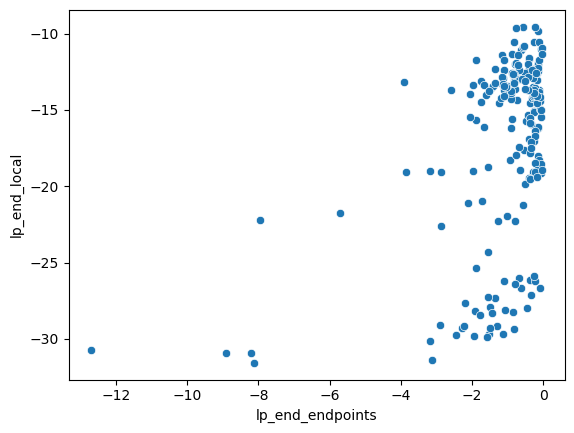

In [44]:
sns.scatterplot(data = df_merged, x = "lp_end_endpoints", y = "lp_end_local")

In [45]:
ss.pearsonr(df_merged['lo_local'], df_merged['lo_endpoints'])

PearsonRResult(statistic=0.4418614992291995, pvalue=1.3997701680628414e-10)